# **데이터 크롤링**

## **1. 크롤링이란?**
    크롤러(crawler)는 자동화된 방법으로 웹을 탐색하는 컴퓨터 프로그램

    '웹 크롤링'(web crawling)??
    
    '데이터 크롤링'(data crawling)!!

    우리는 매일 크롤러도 사용하고 있습니다.

## **2. 웹 크롤링**
    웹 서비스 내 정보를 수집하는 일
    
    필요한 정보가 있다면?
    API 확인 -> 없으면 직접 크롤링
    
    다만 서비스 제공자의 입장에서는??

### 웹 서핑을 하는 의식의 흐름
    브라우저 오픈
    원하는 인터넷페이지 주소 입력
    화면이 열리면 찾고자 하는 정보를 스크롤 하면서 찾기
    문자, 그림, 동영상 조회

### 웹 크롤링 하는 의식의 흐름
    정보를 가져오고자 하는 url 정의
    url 정보로 requests로 정보 요청
    text 정보를 html로 변환
    html에서 우리가 필요한 정보만 선별

### 웹 크롤링을 위해 BeautifulSoup 사용
    requests는 요청을 받기는 하지만 text로만 받음
    API는 통신을 위해 정형화 된 데이터 형태의 text
    우리가 원하는 데이터로 가공하기 위해 편의상 html로 변환
    text를 html로 변환하는 모듈이 beautifulSoup

### 간단한 데이터 크롤링으로 기본 개념잡기

[<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_darkmode@2x.png" style="padding-left: 48px;" width="303"/>,
 <img alt="아시아경제" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/277.png"/>,
 <img alt="MBN" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/057.png"/>,
 <img alt="KBS" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/056.png"/>,
 <img alt="JTBC" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/904.png"/>,
 <img alt="한국경제TV" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/215.png"/>,
 <img alt="시사인" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/308.png"/>,
 <img alt="동아일보" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/020.png"/>,

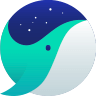
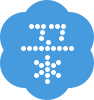

In [1]:
# 필요패키지 import
import numpy as np
import pandas as pd
import requests # 크롤링에 사용하는 패키지
from bs4 import BeautifulSoup # html 변환에 사용함

# url정의
url = 'https://www.naver.com/'

# requsts로 url에 정보요청
response = requests.get(url).text

# 정보를 html 변환 (보기 쉽게)
html = BeautifulSoup(response, 'html.parser')

# html 내에서 우리가 보고 싶은 정보만 선별
html.select('img')

### 실제 개발자가 작성한 코드로 확인된다
    정제되지 않은 데이터로 가독성이 좋지 않음
    우리는 이 중에서 우리가 원하는 정보를 선별해서 가져오는 작업을 진행합니다.
    그러기에 html의 기본 구성을 살펴보도록 하겠습니다.

#### 웹 페이지의 구성
    HTML(Hyper Text Markup Language)
    www 를 구성하는데 사용하는 국제표준 언어로서 컨텐츠와 레이아웃을 담고 있다

    <태그>내용</태그>
    <tag이름 class="class이름1 class이름2" id="주민번호" href="주소"></tag이름>

    형태나 속성을 묘사하기 위한 구조적 언어 : HTML, CSS (계층이 있음)
    웹의 작동 및 제어를 위한 프로그래밍 언어 :  Js

#### 셀렉터
    용도 : html에서 내가 원하는 내용을 찾아내기 위해서
    <span class="news" id="1234">비비고 왕교자</span>

    단일 셀렉터
    
    html.select('span')
    tag : span
    class(별명, 그룹명) : .news
    id(고유값) : #1234

#### 복합 셀렉터
    1. 조합 셀렉터
    <span>1</span>
    <span class="txt">2</span>
    <em class="txt">3</em>
    
    태그 이름이 span이고 클래스 이름은 txt인 라인을 찾고 싶다. : span.txt 
    li 태그 중에서 id가 name 인 라인을 찾고\ 싶다. : li#name

    2. 경로 셀렉터
    <ul>
        <li><span>이걸 찾으려면?</span></li>
    </ul>
    <span>이건 아님</span>

    ul 태그안 li 태그 안 span 라인을 찾는다
    ul > li > span 혹은 ul li span

In [2]:
# url 설정
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=로또'

In [3]:
# requests로 데이터 요청하기
response = requests.get(url).text

In [4]:
# html로 변환
html = BeautifulSoup(response, 'html.parser')

In [5]:
lotto_list = []
for num in html.select('span.num')[:6]:
    lotto_list.append(num.text)

In [6]:
lotto_list

['14', '21', '35', '36', '40', '44']

# 다음에서 로또번호 가져와 볼께요 몽땅 다 가져옵니다

In [7]:
import time

In [8]:
total_lotto_list = []
for i in range(1, 10):
    
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5) # 난수가 생성 생성된 난수에 따라서 요청하는 시간 딜레이
    time.sleep(a)
    
    lotto = []
    url = f'https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q={i}회차%20로또'
    response = requests.get(url)
    
    if response.status_code == requests.codes.ok:
        print('접속성공')
        
        html = BeautifulSoup(response.text, 'html.parser')
        numbers = html.select('span.ball')[:6]
        for num in numbers:
            lotto.append(num.text)
        total_lotto_list.append(lotto)
        
    else:
        break

접속성공
접속성공
접속성공
접속성공
접속성공
접속성공
접속성공
접속성공
접속성공


In [50]:
requests.codes.ok
# 100 우리 이런정보 내주는거야
# 200 성공
# 300 우리 이 사이트 이리루 이사했어 일루가
# 400 유저가 요청을 잘못한경우
# 500 서버 문제

200

In [ ]:
# 차단막는 코드
seed = np.random.randint(100)
np.random.seed(seed)
a = np.random.randint(5)

# 네이버에 사용자로 부터 입력받는 검색어를 입력하고 나오는 결과값의 view(블로그) 페이지에 접근해서 블로그 제목 가져오기

In [76]:
key_word = input('키워드를 입력하세요 :')
url = f'https://search.naver.com/search.naver?where=view&sm=tab_jum&query={key_word}'

response = requests.get(url)

if response.status_code == requests.codes.ok:
    print('접속성공')

html = BeautifulSoup(response.text, 'html.parser')

titles = html.select('a.api_txt_lines')
for title in titles:
    print(title.text, title.attrs['href'])

키워드를 입력하세요 :코로나
접속성공
코로나 19에 의한 뇌손상 기전을 밝히다 https://blog.naver.com/jjy0501/222194097167
코로나19 후유증, 완치가 된 이후에도 신체에 남는다? https://blog.naver.com/dkdkpad/222200709126
면역억제제를 복용하는 류마티스 환자가 코로나19에 감염된다면? - 류마티스내과 강은하 교수 https://blog.naver.com/happy_snubh/222181872058
코로나 백신 우선순위, 접종 순서, 부작용 대처법 알아보기 https://blog.naver.com/junmin120/222225602381
코로나 증상 치료제, 백신 대신 고춧대차?? https://blog.naver.com/youn547/222183298978
코로나19 신약 개발을 둘러싼 궁금증 https://blog.naver.com/nhicblog/222159308889
<安단테> 코로나19와 감기는 어떻게 구분하나요 https://blog.naver.com/koshablog/222140603442
코로나19 가짜뉴스 팩트체크 및 울산 내 선별진료소 찾기 https://blog.naver.com/ulsan-namgu/222219086211
코로나19 RNA 백신 맞아도 되나요? https://post.naver.com/viewer/postView.nhn?volumeNo=30279230&memberNo=3600238&vType=VERTICAL
코로나 근손실, 막는방법! https://post.naver.com/viewer/postView.nhn?volumeNo=30277405&memberNo=45445147&vType=VERTICAL
코로나가 유행할 때에는 해열제 사용을 가급적 피해야 한다 https://blog.naver.com/yimin3181/222154851295
코로나 - 감기 바이러스 때문에 유전자 백신을 맞는다? https://blog.naver.com/hurkle97/222225

    가져온 데이터에 접근을 하는 방식 자체는 판다스 색인처럼 결과값을 확인하며 진행하는 것이 가장 좋습니다.

## **3. 네이버 키워드로 검색한 결과를 크롤링**

## **4. 동적페이지 크롤링**
    최근에는 Js로 변경이 되며 일반적인 크롤링이 되지 않는 경우가 많음
    동적페이지와 숨겨진 url을 가져오는 방법을 알아봅니다

### 네이버 데이터랩 인기검색어 크롤링

In [9]:
import json

# 카테고리 데이터 가져오기
url = 'https://datalab.naver.com/shoppingInsight/getKeywordRank.naver?timeUnit=date&cid=50000000'

# 헤더정보 필요
header = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36',
    'referer': 'https://datalab.naver.com/'
}

response = requests.post(url, headers=header)
data = json.loads(response.text)
data

[{'message': None,
  'statusCode': 200,
  'returnCode': 0,
  'date': '2021/01/28',
  'datetime': '2021.01.28.(목)',
  'range': '',
  'ranks': [{'rank': 1, 'keyword': '원피스', 'linkId': '원피스'},
   {'rank': 2, 'keyword': '트위드자켓', 'linkId': '트위드자켓'},
   {'rank': 3, 'keyword': '여성숏패딩', 'linkId': '여성숏패딩'},
   {'rank': 4, 'keyword': '반팔티', 'linkId': '반팔티'},
   {'rank': 5, 'keyword': '핸드메이드코트', 'linkId': '핸드메이드코트'},
   {'rank': 6, 'keyword': '팬츠', 'linkId': '팬츠'},
   {'rank': 7, 'keyword': '잠옷', 'linkId': '잠옷'},
   {'rank': 8, 'keyword': '쥬시쥬디', 'linkId': '쥬시쥬디'},
   {'rank': 9, 'keyword': '숏패딩', 'linkId': '숏패딩'},
   {'rank': 10, 'keyword': '여성경량패딩', 'linkId': '여성경량패딩'}]},
 {'message': None,
  'statusCode': 200,
  'returnCode': 0,
  'date': '2021/01/29',
  'datetime': '2021.01.29.(금)',
  'range': '',
  'ranks': [{'rank': 1, 'keyword': '원피스', 'linkId': '원피스'},
   {'rank': 2, 'keyword': '트위드자켓', 'linkId': '트위드자켓'},
   {'rank': 3, 'keyword': '반팔티', 'linkId': '반팔티'},
   {'rank': 4, 'keyword': '여성숏패딩

### 다음 주식 일자별 주가 데이터 크롤링

In [10]:
url = 'https://finance.daum.net/api/quote/A285130/days?symbolCode=A285130&page=2&perPage=10&pagination=true'

header = {
    'Referer':'https://finance.daum.net/quotes/A285130?period=day',
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'
}

response = requests.get(url, headers=header)
data = json.loads(response.text)
data

{'data': [{'symbolCode': 'A285130',
   'date': '2021-01-26 15:30:19',
   'tradePrice': 439500.0,
   'tradeTime': '15:30:19',
   'change': 'RISE',
   'changePrice': 25500.0,
   'changeRate': 0.0615942029,
   'prevClosingPrice': 414000.0,
   'exchangeCountry': 'KOREA',
   'openingPrice': 424500.0,
   'highPrice': 449500.0,
   'lowPrice': 420000.0,
   'accTradePrice': 394031245000,
   'accTradeVolume': 899309,
   'periodTradePrice': 394031245000,
   'periodTradeVolume': 899309,
   'listedSharesCount': None},
  {'symbolCode': 'A285130',
   'date': '2021-01-25 15:30:23',
   'tradePrice': 414000.0,
   'tradeTime': '15:30:23',
   'change': 'RISE',
   'changePrice': 3500.0,
   'changeRate': 0.0085261876,
   'prevClosingPrice': 410500.0,
   'exchangeCountry': 'KOREA',
   'openingPrice': 419000.0,
   'highPrice': 426500.0,
   'lowPrice': 412500.0,
   'accTradePrice': 101518295000,
   'accTradeVolume': 242575,
   'periodTradePrice': 101518295000,
   'periodTradeVolume': 242575,
   'listedSharesCo

In [11]:
from pandas.io.json import json_normalize

In [19]:
df = pd.DataFrame(data['data'])

In [13]:
df

,symbolCode,date,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,exchangeCountry,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume,listedSharesCount
0,A285130,2021-01-26 15:30:19,439500.0,15:30:19,RISE,25500.0,0.061594,414000.0,KOREA,424500.0,449500.0,420000.0,394031245000,899309,394031245000,899309,None
1,A285130,2021-01-25 15:30:23,414000.0,15:30:23,RISE,3500.0,0.008526,410500.0,KOREA,419000.0,426500.0,412500.0,101518295000,242575,101518295000,242575,None
2,A285130,2021-01-22 15:30:18,410500.0,15:30:18,FALL,8500.0,-0.020286,419000.0,KOREA,424500.0,429000.0,407000.0,159263501000,381592,159263501000,381592,None
3,A285130,2021-01-21 15:30:17,419000.0,15:30:17,RISE,24500.0,0.062104,394500.0,KOREA,412000.0,422500.0,399500.0,366949044500,888682,366949044500,888682,None
4,A285130,2021-01-20 15:30:05,394500.0,15:30:05,RISE,2500.0,0.006378,392000.0,KOREA,398000.0,405000.0,375500.0,315552795000,800421,315552795000,800421,None
5,A285130,2021-01-19 15:30:11,392000.0,15:30:11,RISE,16000.0,0.042553,376000.0,KOREA,382000.0,393500.0,368500.0,160695133500,417839,160695133500,417839,None
6,A285130,2021-01-18 15:30:29,376000.0,15:30:29,RISE,26500.0,0.075823,349500.0,KOREA,353500.0,378000.0,352000.0,158281906000,427722,158281906000,427722,None
7,A285130,2021-01-15 15:30:01,349500.0,15:30:01,FALL,6500.0,-0.018258,356000.0,KOREA,356000.0,362500.0,346500.0,69139015000,196217,69139015000,196217,None
8,A285130,2021-01-14 15:30:10,356000.0,15:30:10,FALL,5000.0,-0.013850,361000.0,KOREA,359000.0,363000.0,352000.0,51734129500,145147,51734129500,145147,None
9,A285130,2021-01-13 15:30:10,361000.0,15:30:10,RISE,1000.0,0.002778,360000.0,KOREA,365500.0,370000.0,361000.0,43103611500,118455,43103611500,118455,None


### 네이버 주식 삼성전자 일자별 주가 데이터 크롤링 1페이지 부터 10페이지 까지

In [14]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'

header = {
    'referer' : 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=2',
    'user-agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'
}

In [15]:
response = requests.get(url, headers=header)

In [16]:
html = BeautifulSoup(response.text, 'html.parser')

In [17]:
for i in html.select('span.p10'):
    print(i.text)

2021.02.09
2021.02.08
2021.02.05
2021.02.04
2021.02.03
2021.02.02
2021.02.01
2021.01.29
2021.01.28
2021.01.27


In [127]:
html.select('th')

[<th>날짜</th>,
 <th>종가</th>,
 <th>전일비</th>,
 <th>시가</th>,
 <th>고가</th>,
 <th>저가</th>,
 <th>거래량</th>]